In [1]:
import pandas as pd 
import json
import numpy as np

In [2]:
df =  pd.read_pickle('fraud_data_2.pkl')

In [3]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,lat,long,...,hourly_txn_count,daily_txn_count,rolling_mean_amt,amt_deviation,amt_zscore,trans_year,trans_month,trans_day,dob_yr,TimeInSeconds
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,...,0,3,4.97,0.0,-0.651232,2019,1,1,1988,0.0
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,...,0,10,107.23,0.0,0.450317,2019,1,1,1978,26.0
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,...,0,1,220.11,0.0,1.519834,2019,1,1,1962,33.0
3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,...,0,2,45.00,0.0,-0.187121,2019,1,1,1967,58.0
4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,...,0,4,41.96,0.0,-0.597205,2019,1,1,1986,168.0


In [4]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'city', 'state', 'lat', 'long', 'city_pop', 'job',
       'trans_num', 'merch_lat', 'merch_long', 'is_fraud', 'first_last',
       'cc_transaction_count', 'num_credit_cards', 'trans_hour',
       'trans_dayofweek', 'hourly_txn_count', 'daily_txn_count',
       'rolling_mean_amt', 'amt_deviation', 'amt_zscore', 'trans_year',
       'trans_month', 'trans_day', 'dob_yr', 'TimeInSeconds'],
      dtype='object')

Logistic Regression

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, make_scorer

In [6]:
lr_df = df.copy()
lr_df = lr_df[['category', 'trans_day', 'trans_month', 'trans_year', 'amt_zscore', 'amt_deviation', 'rolling_mean_amt', 'daily_txn_count', 'amt', 'hourly_txn_count', 'trans_dayofweek', 'trans_hour',
               'is_fraud', 'city_pop', 'gender', 'dob_yr', 'cc_transaction_count', 'num_credit_cards']]          


In [7]:
lr_df = pd.get_dummies(lr_df, columns=['category', 'gender'], drop_first=True)

In [8]:
lr_df.dtypes

trans_day                    int64
trans_month                  int64
trans_year                   int64
amt_zscore                 float64
amt_deviation              float64
rolling_mean_amt           float64
daily_txn_count              int64
amt                        float64
hourly_txn_count             int32
trans_dayofweek              int64
trans_hour                   int64
is_fraud                     int64
city_pop                     int64
dob_yr                       int64
cc_transaction_count         int64
num_credit_cards             int64
category_food_dining         uint8
category_gas_transport       uint8
category_grocery_net         uint8
category_grocery_pos         uint8
category_health_fitness      uint8
category_home                uint8
category_kids_pets           uint8
category_misc_net            uint8
category_misc_pos            uint8
category_personal_care       uint8
category_shopping_net        uint8
category_shopping_pos        uint8
category_travel     

In [9]:

XLR = lr_df.drop(columns=['is_fraud'])
yLR = lr_df['is_fraud']


X_train, X_test, y_train, y_test = train_test_split(XLR, yLR, test_size=0.2, random_state=42, stratify=yLR)

# scale features for logistic regression
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=XLR.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=XLR.columns)

In [10]:
# NAIVE MODEL

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# performance
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    257834
           1       0.13      0.92      0.23      1501

    accuracy                           0.96    259335
   macro avg       0.56      0.94      0.60    259335
weighted avg       0.99      0.96      0.98    259335

Accuracy: 0.9635066612682438


In [11]:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': np.abs(log_reg.coef_[0])}).reset_index()
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

print(feature_importance)

    index                  Feature  Coefficient
13     13     cc_transaction_count     1.728496
5       5         rolling_mean_amt     1.187290
16     16   category_gas_transport     0.860662
2       2               trans_year     0.831791
8       8         hourly_txn_count     0.703470
18     18     category_grocery_pos     0.666964
25     25    category_shopping_net     0.545435
4       4            amt_deviation     0.541705
7       7                      amt     0.519116
6       6          daily_txn_count     0.510215
26     26    category_shopping_pos     0.509933
17     17     category_grocery_net     0.441941
24     24   category_personal_care     0.439704
21     21       category_kids_pets     0.424249
1       1              trans_month     0.317764
20     20            category_home     0.314281
23     23        category_misc_pos     0.301853
19     19  category_health_fitness     0.291448
15     15     category_food_dining     0.285491
22     22        category_misc_net     0

Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [13]:
rf_df = df.copy()

rf_df = rf_df.drop(columns=['trans_date_trans_time', 'cc_num','state', 'trans_num', 'first_last'])

rf_df.dtypes

merchant                 object
category                 object
amt                     float64
gender                   object
city                     object
lat                     float64
long                    float64
city_pop                  int64
job                      object
merch_lat               float64
merch_long              float64
is_fraud                  int64
cc_transaction_count      int64
num_credit_cards          int64
trans_hour                int64
trans_dayofweek           int64
hourly_txn_count          int32
daily_txn_count           int64
rolling_mean_amt        float64
amt_deviation           float64
amt_zscore              float64
trans_year                int64
trans_month               int64
trans_day                 int64
dob_yr                    int64
TimeInSeconds           float64
dtype: object

In [14]:

# apply label encoding to categorical columns
categorical_cols = ['merchant', 'category', 'gender', 'city', 'job']
for col in categorical_cols:
    rf_df[col] = LabelEncoder().fit_transform(rf_df[col])  

# fit model
XRF = rf_df.drop(columns=['is_fraud'])  
yRF = rf_df['is_fraud']  
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(XRF, yRF, test_size=0.2, random_state=42, stratify=yRF)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced') 
rf_model.fit(X_train_RF, y_train_RF)
y_pred_RF = rf_model.predict(X_test_RF)

# performance
print("Accuracy:", accuracy_score(y_test_RF, y_pred_RF))
print(classification_report(y_test_RF, y_pred_RF))

Accuracy: 0.9986773863921183
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.99      0.78      0.87      1501

    accuracy                           1.00    259335
   macro avg       0.99      0.89      0.94    259335
weighted avg       1.00      1.00      1.00    259335



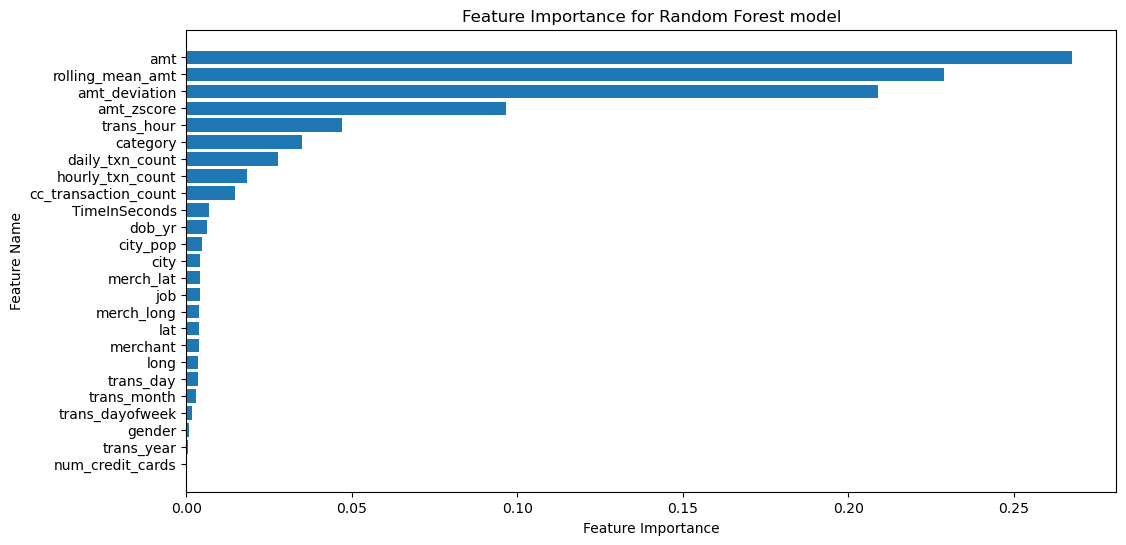

                 Feature  Importance
2                    amt    0.267583
17      rolling_mean_amt    0.228884
18         amt_deviation    0.209004
19            amt_zscore    0.096479
13            trans_hour    0.047022
1               category    0.034856
16       daily_txn_count    0.027698
15      hourly_txn_count    0.018411
11  cc_transaction_count    0.014777
24         TimeInSeconds    0.006943


In [15]:
feature_importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train_RF.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance for Random Forest model')
plt.gca().invert_yaxis()  
plt.show()

print(feature_importance_df.head(10))

In [16]:

# creating another random forest model with most important features 
rf_df_2 = df.copy()
rf_df_2 = rf_df_2[['rolling_mean_amt', 'amt', 'amt_deviation', 'amt_zscore', 'trans_hour', 'category','is_fraud']]

# encode category column
rf_df_2['category'] = LabelEncoder().fit_transform(rf_df_2['category'])  


X_RF2 = rf_df_2.drop(columns=['is_fraud'])
y_RF2 = rf_df_2['is_fraud']
X_train_RF2, X_test_RF2, y_train_RF2, y_test_RF2 = train_test_split(X_RF2, y_RF2, test_size=0.2, random_state=42, stratify=y_RF2)

rf_model_2 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model_2.fit(X_train_RF2, y_train_RF2)


y_pred_RF2 = rf_model_2.predict(X_test_RF2)

# performance
print("Accuracy:", accuracy_score(y_test_RF2, y_pred_RF2))
print(classification_report(y_test_RF2, y_pred_RF2))


Accuracy: 0.9987275146046619
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.95      0.82      0.88      1501

    accuracy                           1.00    259335
   macro avg       0.98      0.91      0.94    259335
weighted avg       1.00      1.00      1.00    259335



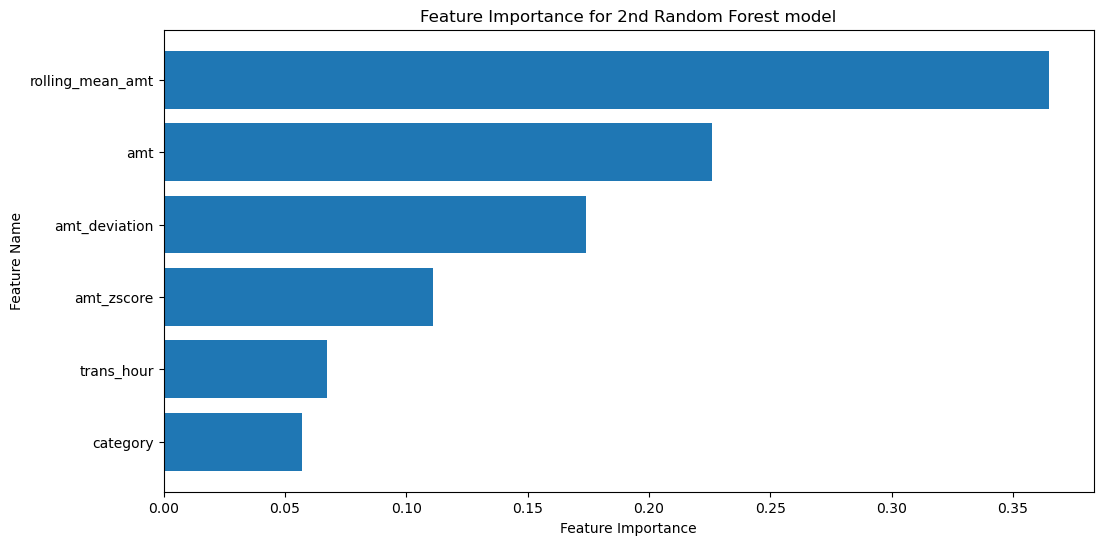

            Feature  Importance
0  rolling_mean_amt    0.364963
1               amt    0.225975
2     amt_deviation    0.173906
3        amt_zscore    0.111008
4        trans_hour    0.067235
5          category    0.056913


In [17]:
# get feature importance
feature_importance = rf_model_2.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train_RF2.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# graph importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance for 2nd Random Forest model')
plt.gca().invert_yaxis() 
plt.show()

# print the feature importance
print(feature_importance_df)

In [18]:

# now apply cross validation to this model 
# use stratified cross validation due to imbalanced classes
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


fold_accuracies = []
fold_reports = []


for fold, (train_idx, test_idx) in enumerate(kf.split(X_RF2, y_RF2), 1):
    print(f"\nTraining Fold {fold}...\n")

    # Split data
    X_train, X_test = X_RF2.iloc[train_idx], X_RF2.iloc[test_idx]
    y_train, y_test = y_RF2.iloc[train_idx], y_RF2.iloc[test_idx]

    # Train 
    rf_model_cv = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    rf_model_cv.fit(X_train, y_train)

    # Predict 
    y_pred = rf_model_cv.predict(X_test)

    # Evaluate performance
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    fold_accuracies.append(acc)
    fold_reports.append(report)

    print(f"Fold {fold} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# Final mean
print(f"\nAverage Accuracy Across Folds: {np.mean(fold_accuracies):.4f}")


Training Fold 1...

Fold 1 Accuracy: 0.9988
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    429723
           1       0.94      0.85      0.89      2502

    accuracy                           1.00    432225
   macro avg       0.97      0.92      0.94    432225
weighted avg       1.00      1.00      1.00    432225


Training Fold 2...

Fold 2 Accuracy: 0.9987
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    429723
           1       0.96      0.81      0.88      2502

    accuracy                           1.00    432225
   macro avg       0.98      0.91      0.94    432225
weighted avg       1.00      1.00      1.00    432225


Training Fold 3...

Fold 3 Accuracy: 0.9988
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    429723
           1       0.96      0.82      0.88      2502

    accuracy                           1.00    

CatBoost

In [19]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

In [20]:
catboost_df = df.copy()
catboost_df=catboost_df.drop(columns=['cc_num', 'trans_num', 'state', 'first_last'])
catboost_df.dtypes

trans_date_trans_time    datetime64[ns]
merchant                         object
category                         object
amt                             float64
gender                           object
city                             object
lat                             float64
long                            float64
city_pop                          int64
job                              object
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
cc_transaction_count              int64
num_credit_cards                  int64
trans_hour                        int64
trans_dayofweek                   int64
hourly_txn_count                  int32
daily_txn_count                   int64
rolling_mean_amt                float64
amt_deviation                   float64
amt_zscore                      float64
trans_year                        int64
trans_month                       int64
trans_day                         int64


In [21]:
cat_features = ['merchant', 'category', 'gender', 'city', 'job']
X_C = catboost_df.drop(columns=['is_fraud'])
y_C = catboost_df['is_fraud']
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(X_C, y_C, test_size=0.2)

# Train 
cat_model = CatBoostClassifier(n_estimators=100, cat_features=cat_features, verbose=0)
cat_model.fit(X_train_C, y_train_C)

y_pred_C = cat_model.predict(X_test_C)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test_C, y_pred_C))


Accuracy: 0.9987599051419978
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257878
           1       0.97      0.91      0.94      1457

    accuracy                           1.00    259335
   macro avg       0.99      0.96      0.97    259335
weighted avg       1.00      1.00      1.00    259335



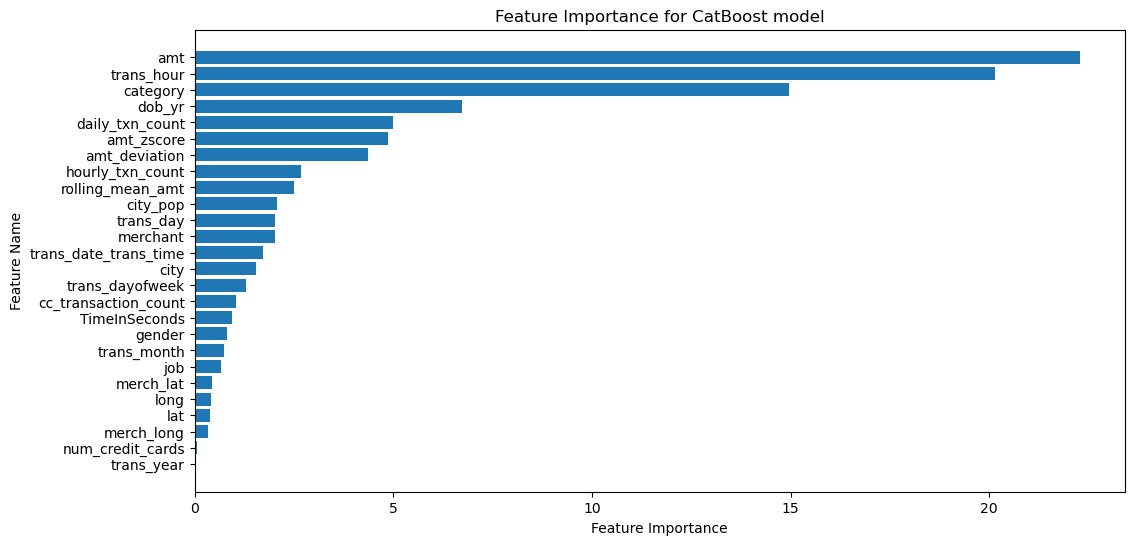

                  Feature  Importance
3                     amt   22.292399
14             trans_hour   20.136622
2                category   14.955278
24                 dob_yr    6.730998
17        daily_txn_count    4.982478
20             amt_zscore    4.860202
19          amt_deviation    4.353483
16       hourly_txn_count    2.679838
18       rolling_mean_amt    2.491042
8                city_pop    2.065317
23              trans_day    2.016956
1                merchant    2.013559
0   trans_date_trans_time    1.731334
5                    city    1.554338
15        trans_dayofweek    1.288887
12   cc_transaction_count    1.052051
25          TimeInSeconds    0.931941
4                  gender    0.810652
22            trans_month    0.743488
9                     job    0.652683
10              merch_lat    0.439360
7                    long    0.422863
6                     lat    0.392784
11             merch_long    0.344972
13       num_credit_cards    0.056475
21          

In [22]:
# get feature importance
feature_importance = cat_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train_C.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# graph importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance for CatBoost model')
plt.gca().invert_yaxis() 
plt.show()

# print the feature importance
print(feature_importance_df)

In [23]:
catboost_df_2 = df.copy()
catboost_df_2 = catboost_df_2[['amt','category','trans_hour','dob_yr','daily_txn_count','amt_zscore','rolling_mean_amt','hourly_txn_count','city_pop','city','is_fraud','amt_deviation', 'cc_transaction_count']]
cat_features = ['category', 'city']
X_C2 = catboost_df_2.drop(columns=['is_fraud'])
y_C2 = catboost_df_2['is_fraud']


In [24]:
# now apply cross validation to this model 


# use stratified cross validation due to imbalanced classes
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


fold_accuracies = []
fold_reports = []


for fold, (train_idx, test_idx) in enumerate(kf.split(X_C2, y_C2), 1):
    print(f"\nTraining Fold {fold}...\n")

    # Split data
    X_train, X_test = X_C2.iloc[train_idx], X_C2.iloc[test_idx]
    y_train, y_test = y_C2.iloc[train_idx], y_C2.iloc[test_idx]

    # Train 
    cat_model_cv = CatBoostClassifier(n_estimators=200, cat_features=cat_features, verbose=0)
    cat_model_cv.fit(X_train, y_train)

    # Predict 
    y_pred = cat_model_cv.predict(X_test)

    # Evaluate performance
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    fold_accuracies.append(acc)
    fold_reports.append(report)

    print(f"Fold {fold} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# Final mean
print(f"\nAverage Accuracy Across Folds: {np.mean(fold_accuracies):.4f}")


Training Fold 1...

Fold 1 Accuracy: 0.9995
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.98      0.93      0.95      1501

    accuracy                           1.00    259335
   macro avg       0.99      0.96      0.98    259335
weighted avg       1.00      1.00      1.00    259335


Training Fold 2...

Fold 2 Accuracy: 0.9993
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.97      0.92      0.94      1501

    accuracy                           1.00    259335
   macro avg       0.98      0.96      0.97    259335
weighted avg       1.00      1.00      1.00    259335


Training Fold 3...

Fold 3 Accuracy: 0.9995
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.98      0.93      0.95      1501

    accuracy                           1.00    

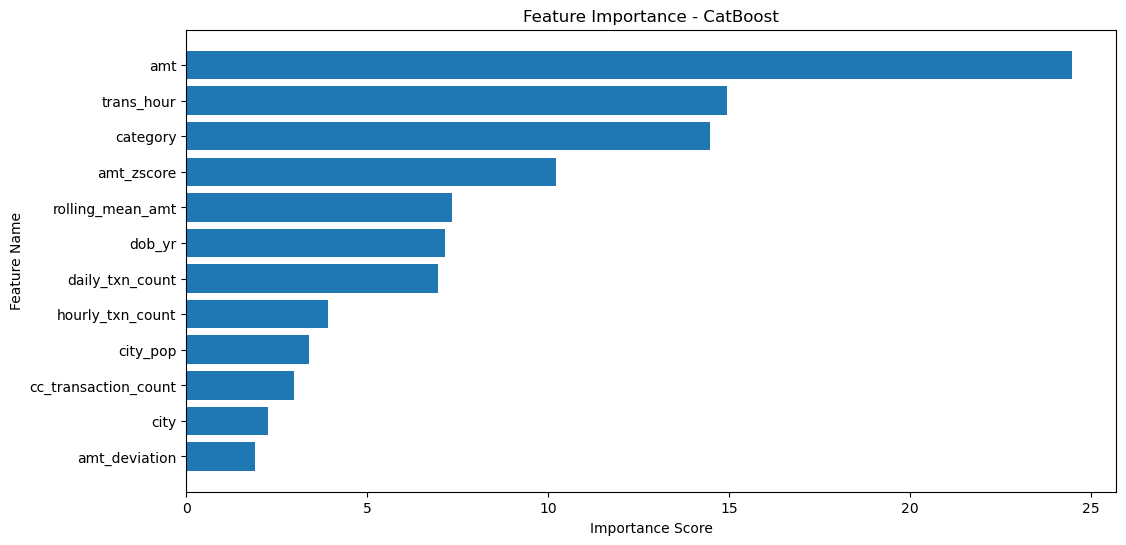


Top 10 Features:
                 Feature  Importance
0                    amt   24.477119
2             trans_hour   14.944266
1               category   14.468183
5             amt_zscore   10.226772
6       rolling_mean_amt    7.340744
3                 dob_yr    7.152452
4        daily_txn_count    6.949097
7       hourly_txn_count    3.912666
8               city_pop    3.393322
11  cc_transaction_count    2.979034
9                   city    2.256630
10         amt_deviation    1.899715


In [25]:

# Feature Importance
feature_importance = cat_model_cv.get_feature_importance()
feature_importance_df = pd.DataFrame({'Feature': X_C2.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot 
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.title('Feature Importance - CatBoost')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


print(feature_importance_df)


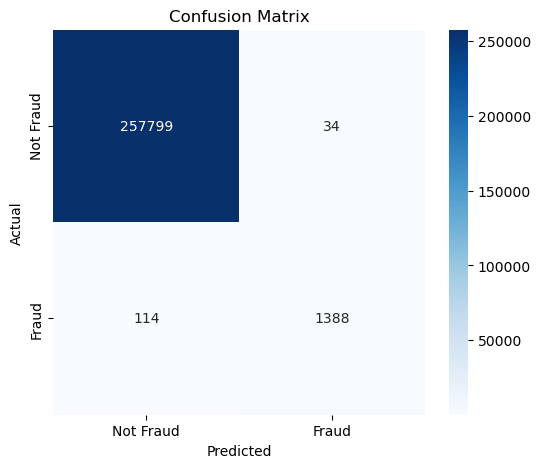

In [26]:

cm = confusion_matrix(y_test, y_pred)

# plot matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

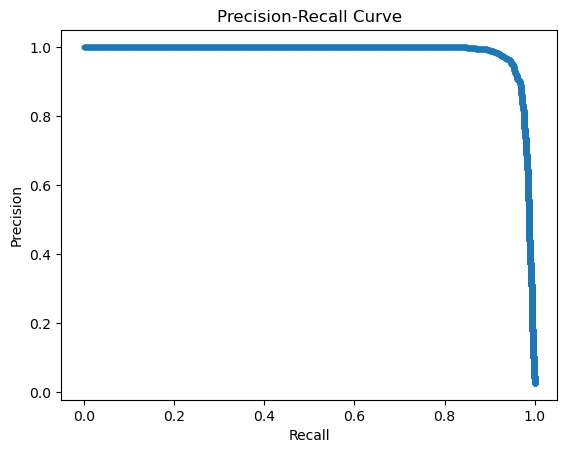

In [27]:


# Get probabilities
y_probs = cat_model_cv.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_probs)

# plot
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [28]:
# get roc auc score
y_pred_probs = cat_model_cv.predict_proba(X_test)[:, 1]  
roc_auc = roc_auc_score(y_test, y_pred_probs)  

print(f"ROC AUC Score: {roc_auc:.4f}")


ROC AUC Score: 0.9994


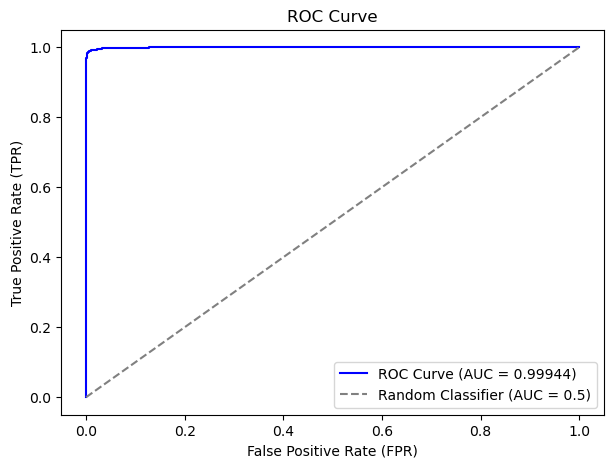

In [29]:

# Plot roc curve

fpr, tpr, _ = roc_curve(y_test, y_pred_probs)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.5f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier (AUC = 0.5)')

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()
